In [1]:
import os
import re
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def parse_ensembling_experiment(experiment_dir):
    """
    Parse ensemble learning experiment directory into dataframe
    """
    accuracy_files = []
    for d in os.listdir(experiment_dir):
        single_run_dir = os.path.join(experiment_dir, d)
        if os.path.isdir(single_run_dir):
            # Find log file
            for f in os.listdir(single_run_dir):
                if "accuracy.txt" in f:
                    accuracy_files.append(os.path.join(experiment_dir, d, f))
    results_file = os.path.join(experiment_dir, "results.csv")
    with open(results_file, "w") as f:
        f.write("trial,accuracy,loss,ensemble_size,model_size\n")
    for acc_f in accuracy_files:
        # Example accuracy file
        # averaging_small_ensemble_size2_loss=0.838_accuracy.txt
        # Get accuracy
        with open(acc_f, "r") as f:
            acc = float(f.readlines()[-1])
        trial = acc_f.split("/")[-2]
        # Get loss
        txt_file = acc_f.split("/")[-1]
        loss = float(re.findall(f'\d+\.\d+', txt_file)[-1])
        ensemble_size = int(re.findall(f"\d+", txt_file)[0])
        # Get model size
        if "small_qavg" in txt_file:
            model_size = "small_qavg"
        elif "medium_qavg" in txt_file:
            model_size = "medium_qavg"
        elif "large_qavg" in txt_file:
            model_size = "large_qavg"
        elif "small" in txt_file:
            model_size = "small"
        elif "medium" in txt_file:
            model_size = "medium"
        elif "large" in txt_file:
            model_size = "large"
        else:
            raise ValueError("No model size captured from logs")
        with open(results_file, "a") as f:
            f.write(f"{trial}, {acc:.2f}, {loss:.3f}, {ensemble_size},{model_size}\n")
    df = pd.read_csv(results_file)
    df = df.sort_values("accuracy", ignore_index=True, ascending=False)
    df.to_csv(results_file, index=False)
    return df


def plot_two_ensembles(df, model1, model2):
    plot_df = df.loc[df["model_size"].isin([model1, model2])]
    display(plot_df)
    fig, ax = plt.subplots(figsize=(4, 3))
    ax = sns.lineplot(
        data=plot_df, 
        x="ensemble_size", 
        y="accuracy", 
        ax=ax, 
        hue="model_size", 
        linewidth=2,
    )
    plt.axhline(y=69.8, linewidth=1, linestyle="--", color="maroon", label="JSC-S")
    plt.axhline(y=72.1, linewidth=1, linestyle="--", color="red", label="JSC-M")
    plt.axhline(y=73.1, linewidth=1, linestyle="--", color="lightcoral", label="JSC-L")
    ax.grid()
    ax.legend()
    ax.set_title("Averaging")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Ensemble Size")
    fig.tight_layout()
    plt.savefig(f"averaging_acc_v_ensemble_size_{model1}_v_{model2}_lineplot.pdf")
    plt.savefig(f"averaging_acc_v_ensemble_size_{model1}_v_{model2}_lineplot.png")

## Averaging

In [3]:
experiment_dir = "../averaging"
df = parse_ensembling_experiment(experiment_dir)
best_single_model_small = {
    "trial": "best_single_model_small",
    "accuracy": 69.8,
    "loss": 0.0, # TODO: Update loss
    "ensemble_size": 1,
    "model_size": "small",
}
best_single_model_med = {
    "trial": "best_single_model_medium",
    "accuracy": 72.1,
    "loss": 0.0, # TODO: Update loss
    "ensemble_size": 1,
    "model_size": "medium",
}
best_single_model_large = {
    "trial": "best_single_model_large",
    "accuracy": 73.1,
    "loss": 0.0, # TODO: Update loss
    "ensemble_size": 1,
    "model_size": "large",
}
best_single_model_small_df = pd.DataFrame(best_single_model_small, index=[0])
best_single_model_med_df = pd.DataFrame(best_single_model_med, index=[0])
best_single_model_large_df = pd.DataFrame(best_single_model_large, index=[0])
df = pd.concat([df, best_single_model_small_df], ignore_index=True)
df = pd.concat([df, best_single_model_med_df], ignore_index=True)
df = pd.concat([df, best_single_model_large_df], ignore_index=True)
df = df.sort_values("accuracy", ignore_index=True, ascending=False)
averaging_df = df
df

,trial,accuracy,loss,ensemble_size,model_size
0,averaging_large_ensemble_size16,75.08,0.689,16,large
1,averaging_medium_ensemble_size32,75.02,0.693,32,medium
2,averaging_large_ensemble_size8,74.99,0.693,8,large
3,large_qavg_ensemble_size6,74.95,0.695,6,large_qavg
4,averaging_medium_ensemble_size16,74.82,0.698,16,medium
5,averaging_large_ensemble_size4,74.67,0.703,4,large
6,averaging_small_ensemble_size128,74.58,0.707,128,small
7,large_qavg_ensemble_size4,74.54,0.704,4,large_qavg
8,averaging_medium_ensemble_size8,74.43,0.709,8,medium
9,averaging_small_ensemble_size64,74.34,0.715,64,small


,trial,accuracy,loss,ensemble_size,model_size
0,averaging_large_ensemble_size16,75.08,0.689,16,large
1,averaging_medium_ensemble_size32,75.02,0.693,32,medium
2,averaging_large_ensemble_size8,74.99,0.693,8,large
4,averaging_medium_ensemble_size16,74.82,0.698,16,medium
5,averaging_large_ensemble_size4,74.67,0.703,4,large
6,averaging_small_ensemble_size128,74.58,0.707,128,small
8,averaging_medium_ensemble_size8,74.43,0.709,8,medium
9,averaging_small_ensemble_size64,74.34,0.715,64,small
11,averaging_large_ensemble_size2,74.17,0.718,2,large
13,averaging_small_ensemble_size32,73.92,0.728,32,small


/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


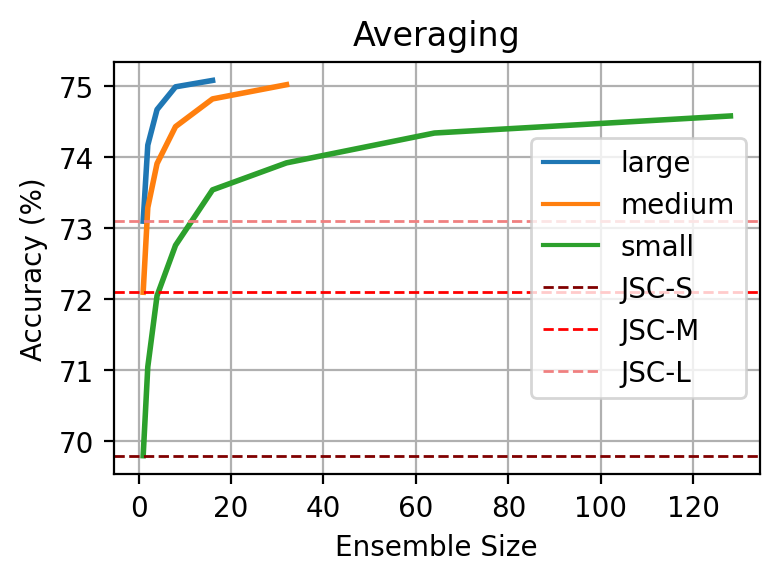

In [4]:
"""
Line plot of accuracy vs ensemble size
"""
plot_df = df.loc[df["model_size"].isin(["small", "medium", "large"])]
display(plot_df)
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.lineplot(
    data=plot_df, 
    x="ensemble_size", 
    y="accuracy", 
    ax=ax, 
    hue="model_size", 
    linewidth=2,
    # label="JSC-S Ensemble"
)
plt.axhline(y=69.8, linewidth=1, linestyle="--", color="maroon", label="JSC-S")
plt.axhline(y=72.1, linewidth=1, linestyle="--", color="red", label="JSC-M")
plt.axhline(y=73.1, linewidth=1, linestyle="--", color="lightcoral", label="JSC-L")
ax.grid()
ax.legend()
ax.set_title("Averaging")
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Ensemble Size")
fig.tight_layout()
plt.savefig("averaging_acc_v_ensemble_size_lineplot.pdf")
plt.savefig("averaging_acc_v_ensemble_size_lineplot.png")

,trial,accuracy,loss,ensemble_size,model_size
6,averaging_small_ensemble_size128,74.58,0.707,128,small
9,averaging_small_ensemble_size64,74.34,0.715,64,small
13,averaging_small_ensemble_size32,73.92,0.728,32,small
16,averaging_small_ensemble_size16,73.54,0.744,16,small
20,averaging_small_ensemble_size8,72.76,0.764,8,small
22,averaging_small_ensemble_size4,72.05,0.793,4,small
23,small_qavg_ensemble_size6,71.88,0.824,6,small_qavg
24,small_qavg_ensemble_size4,71.25,0.849,4,small_qavg
25,averaging_small_ensemble_size2,71.05,0.838,2,small
26,small_qavg_ensemble_size2,70.75,0.865,2,small_qavg


/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


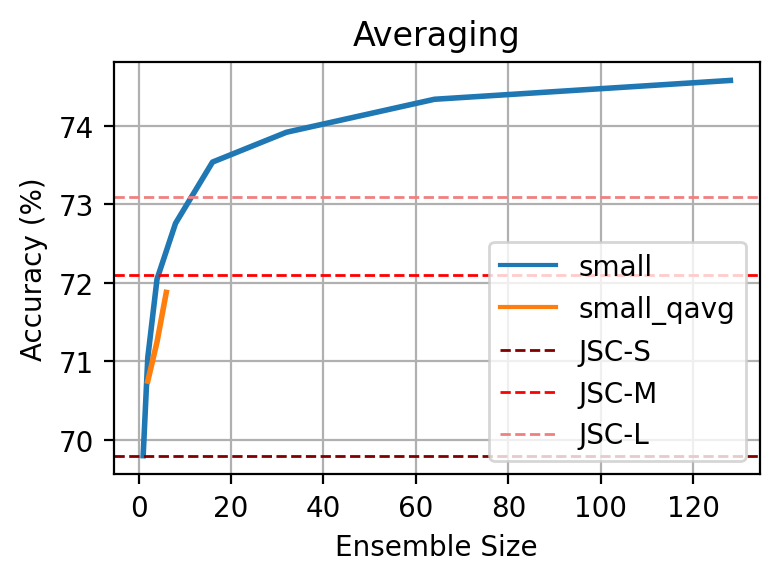

In [62]:
plot_two_ensembles(df, "small", "small_qavg")

,trial,accuracy,loss,ensemble_size,model_size
1,averaging_medium_ensemble_size32,75.02,0.693,32,medium
4,averaging_medium_ensemble_size16,74.82,0.698,16,medium
8,averaging_medium_ensemble_size8,74.43,0.709,8,medium
12,medium_qavg_ensemble_size6,74.10,0.725,6,medium_qavg
14,averaging_medium_ensemble_size4,73.91,0.728,4,medium
15,medium_qavg_ensemble_size4,73.82,0.733,4,medium_qavg
17,averaging_medium_ensemble_size2,73.29,0.748,2,medium
18,medium_qavg_ensemble_size2,73.12,0.755,2,medium_qavg
21,best_single_model_medium,72.10,0.000,1,medium


/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


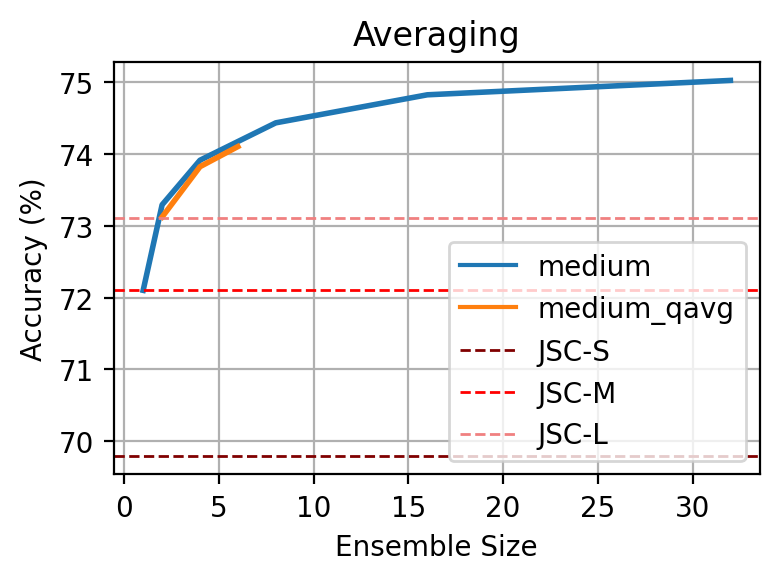

In [63]:
plot_two_ensembles(df, "medium", "medium_qavg")

,trial,accuracy,loss,ensemble_size,model_size
0,averaging_large_ensemble_size16,75.08,0.689,16,large
2,averaging_large_ensemble_size8,74.99,0.693,8,large
3,large_qavg_ensemble_size6,74.95,0.695,6,large_qavg
5,averaging_large_ensemble_size4,74.67,0.703,4,large
7,large_qavg_ensemble_size4,74.54,0.704,4,large_qavg
10,large_qavg_ensemble_size2,74.17,0.718,2,large_qavg
11,averaging_large_ensemble_size2,74.17,0.718,2,large
19,best_single_model_large,73.10,0.000,1,large


/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/olivia/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


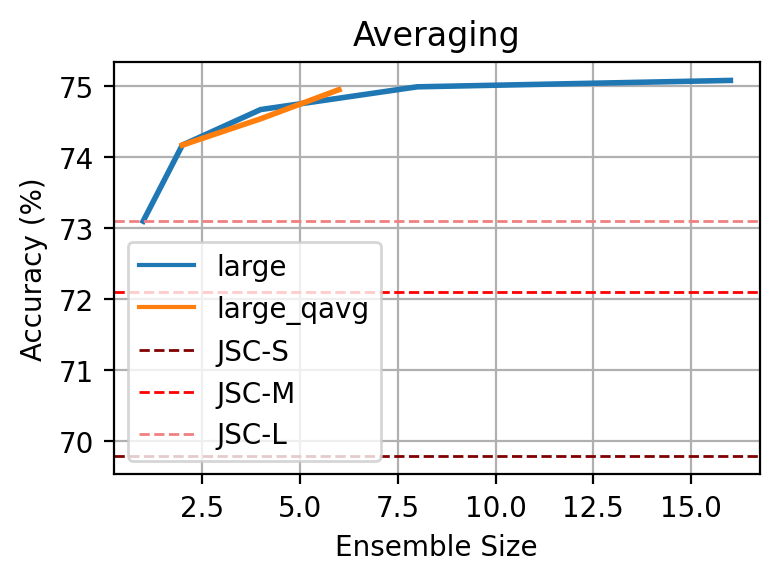

In [64]:
plot_two_ensembles(df, "large", "large_qavg")